In [4]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math
from matplotlib.colors import ListedColormap
from ml.data import create_classification_data
from ml.distances import euclidean, manhattan, cosine
from ml.visualization import kneighbors_boundary

%matplotlib inline

# K Nearest Neighbors

## Generación de datos

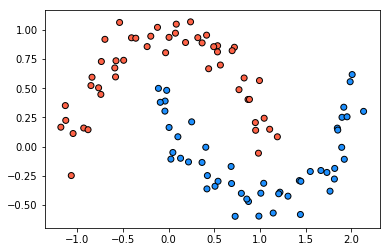

In [7]:
X, y = create_classification_data("nonlineal", negative_label=0)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots, edgecolors='k')
plt.show()

## Frontera de Decisión

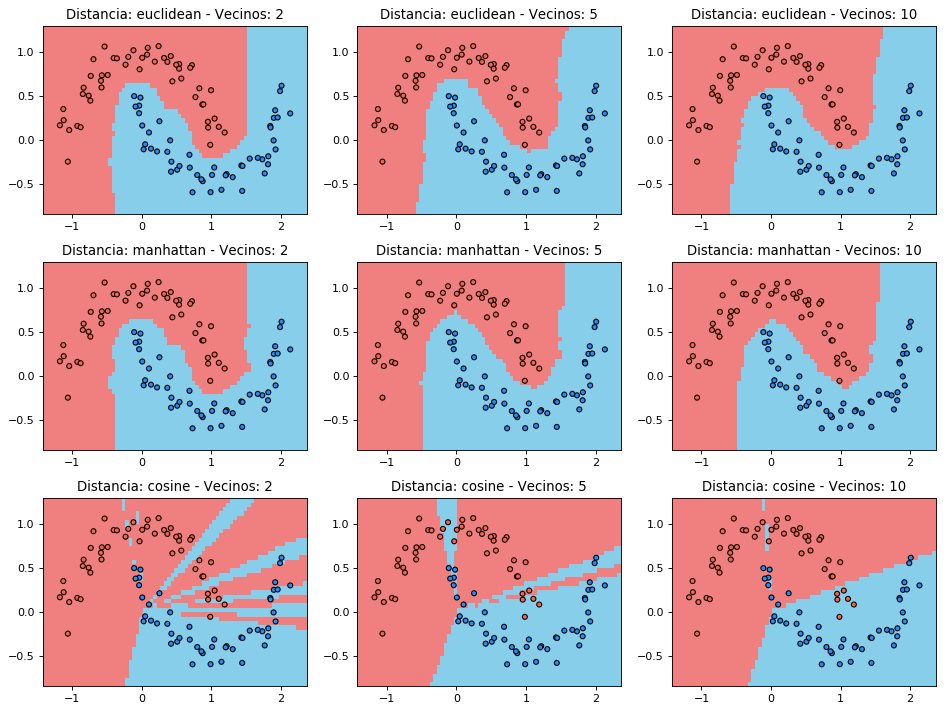

In [6]:
plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')

for i, distance in enumerate([euclidean, manhattan, cosine]):
    for j, neighbors in enumerate([2, 5, 10]):
        xx, yy, Z = kneighbors_boundary(X, y, neighbors, distance)

        plt.subplot(3, 3, 1 + j + i * 3)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_back)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dots,
                   edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Distancia: %s - Vecinos: %d" % (distance.__name__, neighbors))

plt.tight_layout()
plt.show()